# Задания

In [1]:
import numpy as np
import pandas as pd

## Задание 1

Загрузи информацию о [заявках на кредит](datasets/credit_scoring.csv). 
Перечисли имена клиентов, которым должны одобрить заявку на кредит, исходя из изображенного дерева решений.

<center><img src="../misc/images/simple-tree.png" width="440" height="440"/> <center/>

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
data = pd.read_csv('..\datasets\credit_scoring.csv')
data.head ()

,Имя,Возраст,Месячный доход
0,Николай,39,5600
1,Ольга,43,12000
2,Митя,17,15000
3,Вика,19,9600
4,Петр,21,20000


In [3]:
# Загрузка csv-файла в DataFrame
df = pd.read_csv('..\datasets\credit_scoring.csv')

# Выбор клиентов, которым одобрить заявку на кредит
approved_clients = df[(df["Возраст"] >= 18) & (df["Месячный доход"] > 10000)]["Имя"]

# Вывод имен клиентов
for name in approved_clients:
    print(name)

Ольга
Петр


Клиенты, которым должны одобрить заявку на кредит: Ольга, Петр

## Задание 2

Давай решим задачу классификации.
Загрузи классический датасет [классификации ирисов](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset).
В нем содержатся измерения параметров чашелистиков и лепестков для различных подвидов ирисов. 
Отрисуй диаграмму рассеяния (Scatterplot) в координатах "Длина чашелистика" / "Длина лепестка", цвет маркера должен 
показывать вид ириса. Обязательно добавь легенду по маркерам. 

In [4]:
# Код тут
from sklearn.datasets import load_iris

iris = load_iris()

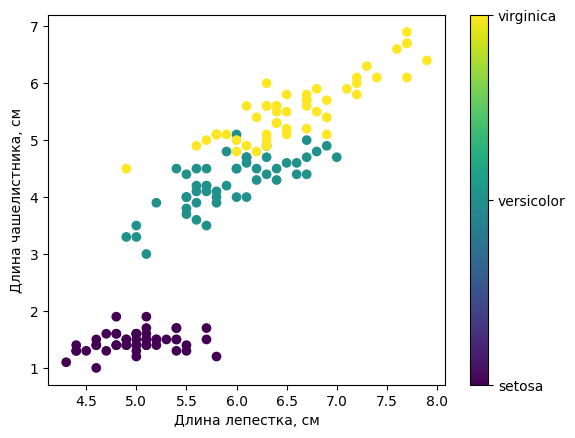

In [5]:
import matplotlib.pyplot as plt

x_index = 0
y_index = 2

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Длина чашелистника, см')

plt.show()

## Задание 3

Попробуй решить задачу классификации подвидов ирисов с помощью деревьев решений.
Раздели датасет на обучающую и тестовую с параметрами `test_size=0.2`, `random_state=42`

Используя только признаки "Длина чашелистика" и "Длина лепестка", обучи дерево решений с глубиной дерева 2.
Посчитай точность (accuracy) классификации и округли её до 3 знаков после запятой.

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Загружаем датасет
iris = load_iris()

# Разделяем датасет на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, [0, 2]], iris.target, 
                                                    test_size=0.2, random_state=42)

# Обучаем дерево решений
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

# Просчитываем точность классификации на тестовой выборке
accuracy = accuracy_score(y_test, clf.predict(X_test))

# Выводим точность с округлением до 3 знаков после запятой
print(f'Точность классификации: {accuracy:.3f}')

Точность классификации: 0.967


## Задание 4

Построй [разделяющую поверхность](code-samples/surface.py) по признакам "Длина чашелистика" и "Длина лепестка". 
Также отрисуй дерево, которое получилось в результате обучения модели. 
Напиши сколько листов у получившегося дерева.

In [7]:
import sys
sys.path.append('../code-samples/')

In [8]:
from surface import plot_decision_surface
from dataset import generate_sin

Количество листьев дерева решений: 3


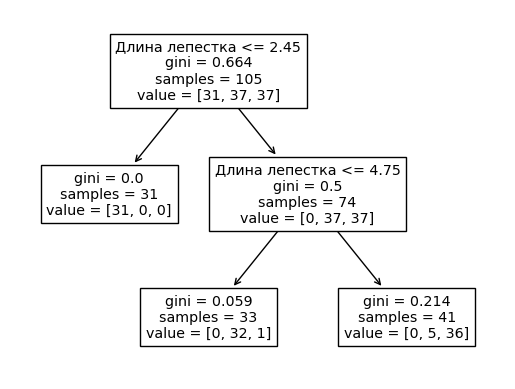

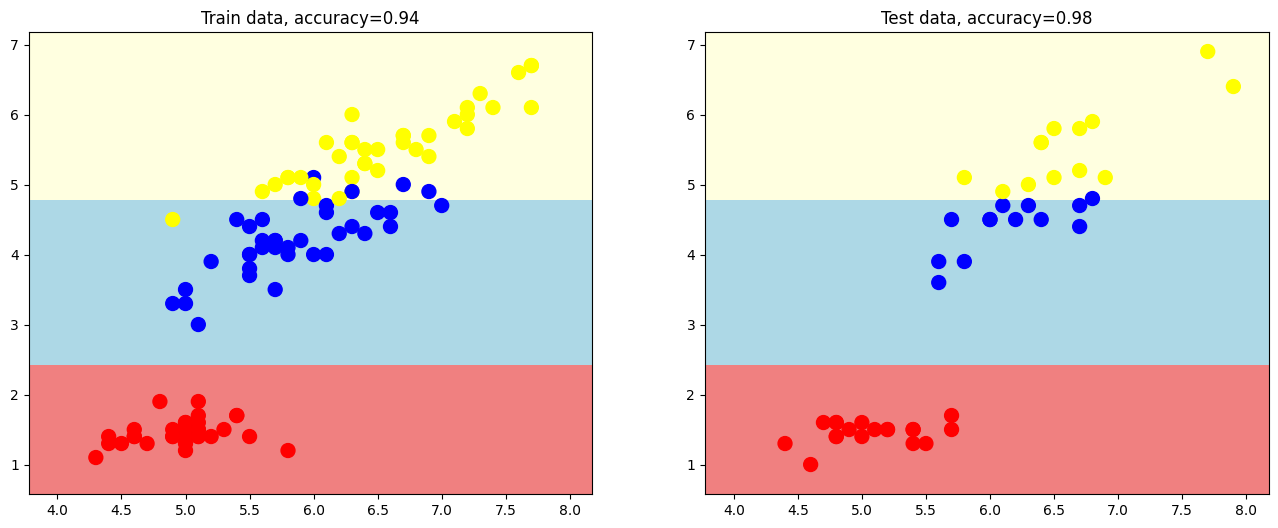

In [9]:
# Загрузка и подготовка данных
import pandas as pd 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

data = load_iris()
X = data.data[:, [0, 2]]
y = data.target

# Разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение модели дерева решений
model = DecisionTreeClassifier(random_state=42, max_depth=2)
model.fit(X_train, y_train)

# Визуализация дерева
tree.plot_tree(model, feature_names=['Длина чашелистика', 'Длина лепестка'])

# Визуализация разделяющей поверхности
train_data = pd.DataFrame(X_train, columns=['sepal_length', 'petal_length'])
test_data = pd.DataFrame(X_test, columns=['sepal_length', 'petal_length'])
plot_decision_surface(model, train_data, y_train, test_data, y_test)

# Определение количества листьев дерева решений
print("Количество листьев дерева решений:", model.tree_.n_leaves)
 

У получившегося дерева 3 листа

## Задание 5

Теперь попробуем с помощью деревьев решений решить задачу регрессии.
Сгенерируй [синусоидальный сигнал](code-samples/dataset.py) с небольшими шумами размером 250 отсчетов. 
Раздели датасет на обучающую и тестовую с параметрами `test_size=0.2`, `random_state=42`.
Обучи дерево решений для предсказания синусоидального сигнала c глубиной дерева 1. 
Построй график истинных ответов и предсказаний модели. Построив само дерево решений ты сможешь понять причины такого поведения модели.

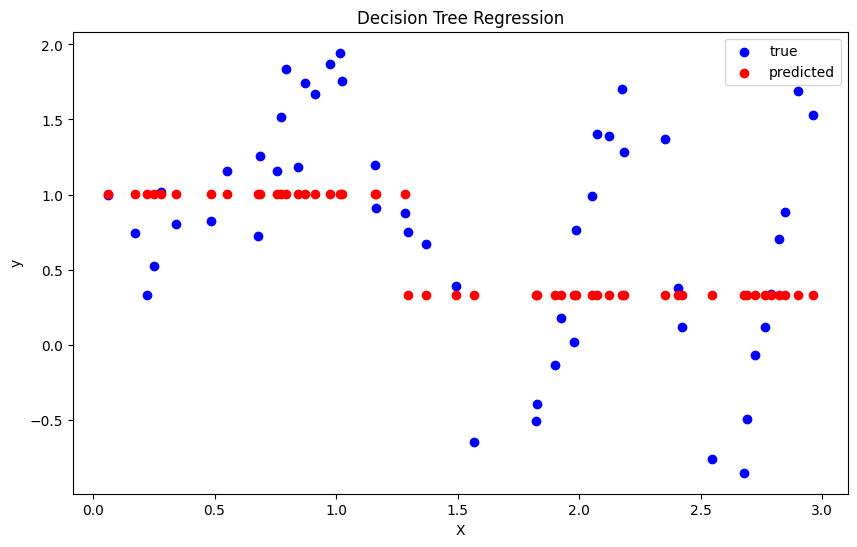

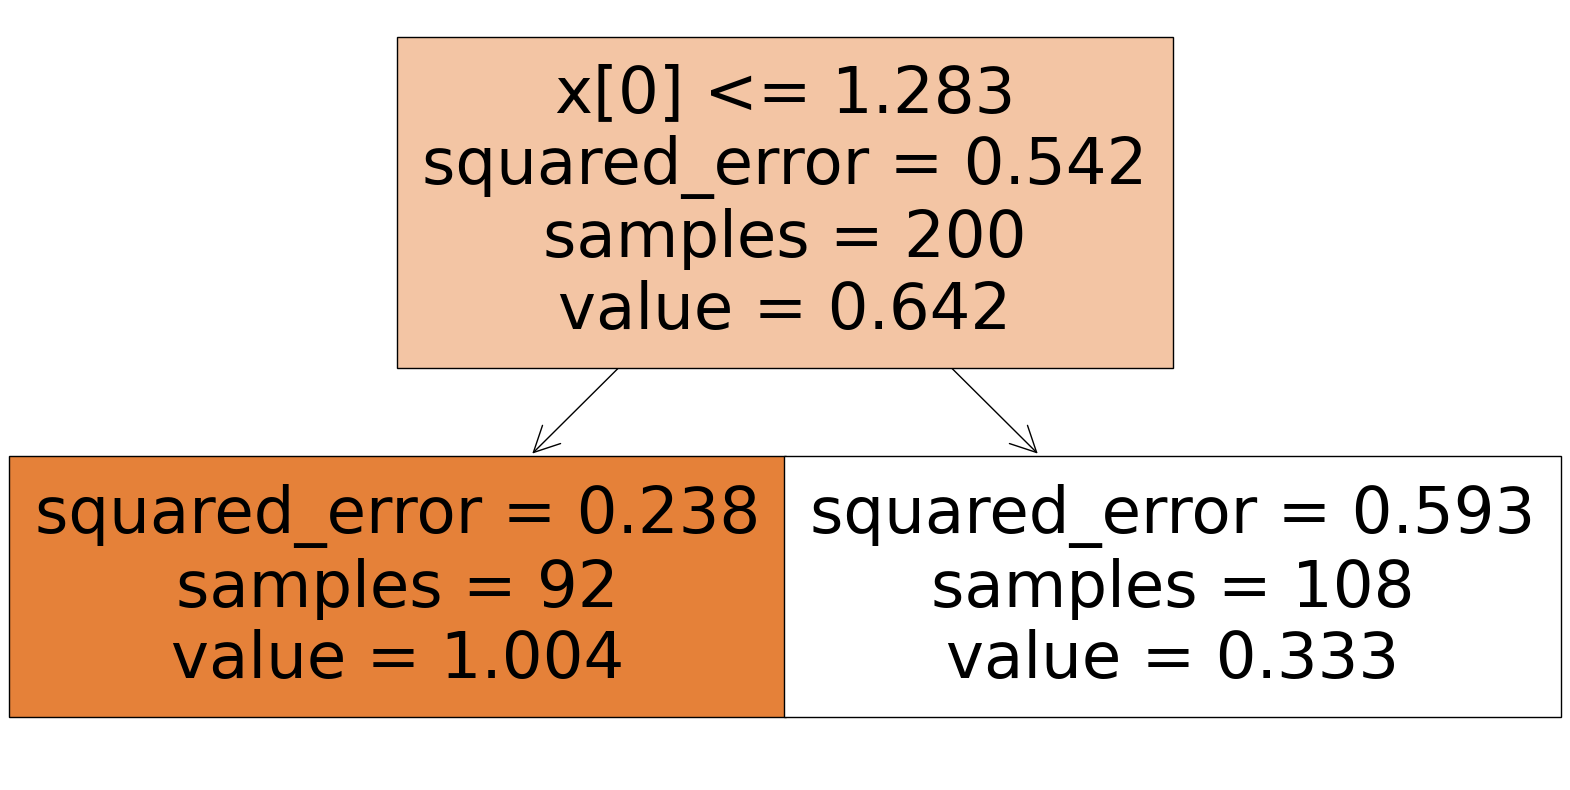

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from dataset import generate_sin

# генерация синусоидального сигнала с шумом
X, y = generate_sin(250)

# разделение датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# обучение дерева решений
tree = DecisionTreeRegressor(max_depth=1)
tree.fit(X_train.reshape(-1, 1), y_train)

# предсказание на тестовой выборке
y_pred = tree.predict(X_test.reshape(-1, 1))

# построение графика истинных ответов и предсказаний модели
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='true')
plt.scatter(X_test, y_pred, color='red', label='predicted')
plt.legend()
plt.title('Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# построение графика дерева решений
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True)
plt.show()

## Задание 6

Попробуй менять грубину дерева в дереве решений для предсказания синуса.
Построй график зависимости среднеквадратичной ошибки (MSE) предсказания на тестовой выборке от глубины дерева
(от 1 до 30). Напиши глубину дерева, при которой качество модели наилучшее. 

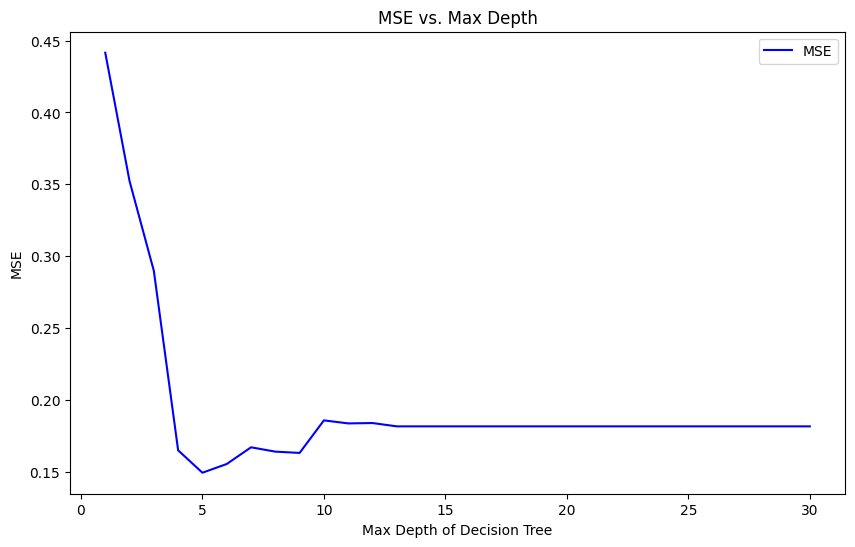

Оптимальная глубина: 5 при MSE: 0.1494779464670558


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from dataset import generate_sin

# генерация синусоидального сигнала с шумом
X, y = generate_sin(250, n=1)

# разделение датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_depth_range = range(1, 31)
mse_scores = []

# обучение деревьев решений
for depth in max_depth_range:
    tree = DecisionTreeRegressor(max_depth=depth)
    tree.fit(X_train.reshape(-1, 1), y_train)
    y_pred = tree.predict(X_test.reshape(-1, 1))
    mse_scores.append(mean_squared_error(y_test, y_pred))

# построение графика зависимости MSE от глубины дерева
plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, mse_scores, color='blue', label='MSE')
plt.title('MSE vs. Max Depth')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('MSE')
plt.legend()
plt.show()

# вывод глубины дерева с минимальным значением MSE
min_mse_depth = np.argmin(mse_scores) + 1
print("Оптимальная глубина:", min_mse_depth, "при MSE:", mse_scores[min_mse_depth-1])

Глубина дерева, на котором MSE на тестовой выборке наилучший: 5

## Задание 7

Познакомься с методом bootstrap. Воспользуйся `BaggingRegressor` из `sklearn.ensemble` для того, чтобы обучить сразу 
несколько деревьев решений c параметром `max_depth=5`. \
Рассчитай среднеквадратичную ошибку (MSE) предсказания на тестовой выборке. Построй график зависимости MSE 
от **количества базовых моделей** в `BaggingRegressor` с параметрами `bootstrap=True, random_state=42` (от 1 до 50). 
Напиши количество деревьев, при котором качество модели наилучшее. 

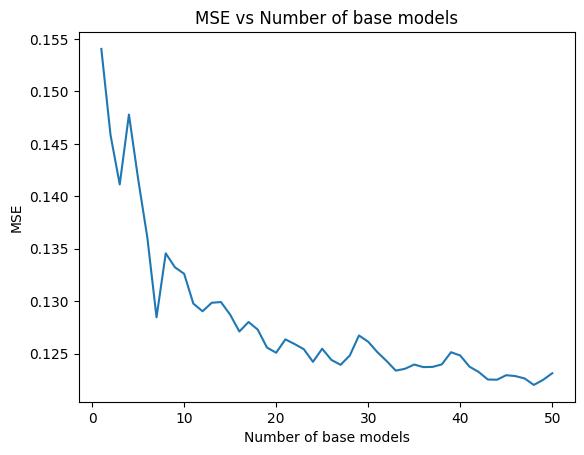

Оптимальное количество:  48


In [12]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt
from dataset import generate_sin

# генерируем синусоидальный сигнал
x, y = generate_sin(250)

# Разделение датасета на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Обучение нескольких деревьев решений с помощью BaggingRegressor
max_depth = 5
n_estimators = 50
mse_values = []
estimators = []

for i in range(1, n_estimators+1):
    model = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=max_depth),
                             n_estimators=i,
                             bootstrap=True,
                             random_state=55)
    model.fit(x_train.reshape(-1, 1), y_train)
    y_pred = model.predict(x_test.reshape(-1, 1))
    mse_values.append(mean_squared_error(y_test, y_pred))
    estimators.append(model)

# Построение графика зависимости MSE от количества базовых моделей
plt.plot(range(1, n_estimators+1), mse_values)
plt.xlabel('Number of base models')
plt.ylabel('MSE')
plt.title('MSE vs Number of base models')
plt.show()

# Находим количество базовых моделей, при котором качество модели наилучшее
optimal_n_estimators = np.argmin(mse_values) + 1
print("Оптимальное количество: ", optimal_n_estimators)

Количество деревьев решений, при котором MSE на тестовой выборке наилучший: 48

## Задание 8

Познакомься с алгоритмом случайного леса (Random Forest). Обучи алгоритм случайного леса с параметрами `max_depth=5, 
n_estimators=100, max_features=1, random_state=42`.
Посчитай MSE на тестовой выборке и округли её до 3 знаков после запятой.

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from dataset import generate_sin

# генерируем синусоидальный сигнал
x, y = generate_sin(250)

# Разделение датасета на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Обучение алгоритма случайного леса
max_depth = 5
n_estimators = 100
max_features = 1
random_state = 42

model = RandomForestRegressor(max_depth=max_depth,
                              n_estimators=n_estimators,
                              max_features=max_features,
                              random_state=random_state)
model.fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_test.reshape(-1, 1))

# Рассчитываем MSE на тестовой выборке и округляем результат до 3 знаков после запятой
mse = round(mean_squared_error(y_test, y_pred), 3)
print("MSE on test data:", mse)

MSE on test data: 0.123
